In [504]:
# %%pycodestyle
import pandas as pd
import numpy as np
import re
# Load package to confirm the code is PEP-8 formmat
# %load_ext pycodestyle_magic
# Load libraries

---

In [505]:
# %%pycodestyle
# Set display to see data.
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

---

In [506]:
# %%pycodestyle
# Load dataframe
df = pd.read_csv("./DOT_teste_data_science.csv", encoding='ISO-8859-1')

In [507]:
# %%pycodestyle
# Change Column names
df.columns = ['Id', 'PlaceTest', 'DateTest',
              'Rate', 'TextRate', 'HourTest',
              'Sex', 'MaritalStatus', 'Education',
              'Hometown', 'Neighborhood']

# Create new dataframe with the changes and preserve the original
df2 = df

# Drop ID column
df2 = df2.drop(['Id'], axis=1)

# Show new dataframe
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood
0,GO - Goiás,13/01/2017,"7,45","2,2",manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,GO - Goiás,10/01/2017,"7,4","2,4",manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,GO - Goiás,07/01/2017,"7,3","1,8",manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,GO - Goiás,02/01/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,GO - Goiás,09/01/2017,"6,95","1,7",manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


In [508]:
# %%pycodestyle
# Check if there is all values.
df2.isnull().values.any()

True

In [509]:
# %%pycodestyle
# Unique Counts


def isNaN(df):
    for i in df.columns:
        count = df[i].isnull().values.any()
        print(i, ": ", count)


# Check all columns, True = There is NaN, False = There is no Nan.
print(isNaN(df2))

PlaceTest :  False
DateTest :  True
Rate :  False
TextRate :  False
HourTest :  True
Sex :  True
MaritalStatus :  True
Education :  True
Hometown :  True
Neighborhood :  True
None


In [510]:
# %%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


PlaceTest        object
DateTest         object
Rate             object
TextRate         object
HourTest         object
Sex              object
MaritalStatus    object
Education        object
Hometown         object
Neighborhood     object
dtype: object

In [511]:
# %%pycodestyle
# Change comma to dot.
df2.Rate.replace(",", ".", regex=True, inplace=True)
df2.TextRate.replace(",", ".", regex=True, inplace=True)
# Change slash to -
df2.DateTest.replace("/", "-", regex=True, inplace=True)
# Transform Rate and TextRate to float.
df2[["Rate", "TextRate"]] = df2[["Rate", "TextRate"]].apply(pd.to_numeric)

In [512]:
# %%pycodestyle
# Create new column to identify who has rate above zero.
conditions = [(df2['Rate'] >= 5.0) & (df2['TextRate'] > 0.0)]
choices = [1]

df2['Approved'] = np.select(conditions, choices, default=0)


In [513]:
# %%pycodestyle
# Create new column to with sum of Rate and TextRate.
df2['AllRate'] = df2['Rate'] + df2['TextRate']


In [514]:
# %%pycodestyle
# Create new column to identify who doesn't have TextRate > 0.
conditions = [(df2['TextRate'] > 0.0)]
choices = [1]

df2['HasTextRate'] = np.select(conditions, choices, default=0)


In [515]:
# %%pycodestyle
# Convert column DateTest to pandas datetime.
df2['DateTest'] = pd.to_datetime(df2['DateTest'])

In [516]:
# %%pycodestyle
# Create columns Month and Year, and fill them with 0 fields that is NaN
df2['Month'] = df2.DateTest.dt.month
df2['Year'] = df2.DateTest.dt.year
df2['Month'] = df2['Month'].fillna(0).astype(int)
df2['Year'] = df2['Year'].fillna(0).astype(int)

In [517]:
# %%pycodestyle
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,GO - Goiás,2017-01-13,7.45,2.2,manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul,1,9.65,1,1,2017
1,GO - Goiás,2017-10-01,7.40,2.4,manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras),1,9.80,1,10,2017
2,GO - Goiás,2017-07-01,7.30,1.8,manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
3,GO - Goiás,2017-02-01,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte,1,8.90,1,2,2017
4,GO - Goiás,2017-09-01,6.95,1.7,manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I,1,8.65,1,9,2017


In [518]:
# %%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


PlaceTest                object
DateTest         datetime64[ns]
Rate                    float64
TextRate                float64
HourTest                 object
Sex                      object
MaritalStatus            object
Education                object
Hometown                 object
Neighborhood             object
Approved                  int64
AllRate                 float64
HasTextRate               int64
Month                     int64
Year                      int64
dtype: object

In [519]:
# %%pycodestyle
print('Decribe: ')
df2.describe()

Decribe: 


,Rate,TextRate,Approved,AllRate,HasTextRate,Month,Year
count,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000,12100.000000
mean,4.577988,0.874373,0.481570,5.452361,0.532314,5.327273,2009.950909
std,1.704218,0.855287,0.499681,2.510222,0.498975,4.050736,115.761342
min,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2016.000000
50%,4.850000,1.100000,0.000000,6.150000,1.000000,5.000000,2017.000000
75%,5.950000,1.700000,1.000000,7.600000,1.000000,8.000000,2017.000000
max,10.000000,2.500000,1.000000,12.500000,1.000000,12.000000,2017.000000


In [520]:
# %%pycodestyle
sqlqry = sqldf("select MaritalStatus, Education, COUNT(Approved) "
               "as Approved from df2 WHERE Approved = 1 AND "
               "MaritalStatus = 4 AND Education = 8 group by "
               "MaritalStatus, Education order by 1")
# (Approved = 1 AND MaritalStatus = 4) AND (Approved = 1 AND MaritalStatus = 1)
# AND (Approved = 1 AND Education = 3) AND (Approved = 1 AND Education = 8)
# AND (Approved = 1 AND Education = 9)

sqlqry

,MaritalStatus,Education,Approved


In [521]:
# %%pycodestyle
# Unique Counts


def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)


print(unique_counts(df2))

PlaceTest :  21
DateTest :  34
Rate :  123
TextRate :  26
HourTest :  2
Sex :  2
MaritalStatus :  6
Education :  10
Hometown :  4602
Neighborhood :  4426
Approved :  2
AllRate :  161
HasTextRate :  2
Month :  13
Year :  3
None


In [522]:
# %%pycodestyle
print('Sex: ', df2.Sex.unique())
print('HourTest: ', df2.HourTest.unique())
print('MaritalStatus: ', df2.MaritalStatus.unique())
print('Education: ', df2.Education.unique())
print('PlaceTest: ', df2.PlaceTest.unique())
print('Month: ', df2.Month.unique())
print('Year: ', df2.Year.unique())

Sex:  ['Masculino' 'Feminino' nan]
HourTest:  ['manhã' 'Noite' nan]
MaritalStatus:  ['Casado(a)' 'Solteiro(a)' 'Divorciado(a)' 'Separado(a)' 'Viúvo(a)' nan
 '0']
Education:  ['Ensino médio' 'Especialização' 'Superior' 'Superior incompleto'
 'Mestrado' 'MBA' 'Nível técnico' 'Ensino fundamental' nan 'Doutorado'
 'Não informado']
PlaceTest:  ['GO - Goiás' 'MG - Minas Gerais' 'MS - Mato Grosso do Sul' 'PA - Pará'
 'PB - Paraíba' 'RJ - Rio de Janeiro' 'SC - Santa Catarina' 'SE - Sergipe'
 'CE - Ceará' 'PI - Piauí' 'RN - Rio Grande do Norte' 'BA - Bahia'
 'RS - Rio Grande do Sul' 'RO - Rondônia' 'MT - Mato Grosso'
 'PE - Pernambuco' 'RR - Roraima' 'MA - Maranhão' 'ES - Espírito Santo'
 'TO - Tocantins' 'AM - Amazonas']
Month:  [ 1 10  7  2  9  5  8 12  6  3  0 11  4]
Year:  [2017    0 2016]


In [523]:
# %%pycodestyle
# Change Sex from text to integer: 0 - NaN, 1-Male, 2-Female.
conditions = [(df2['Sex'] == 'Masculino'),
              (df2['Sex'] == 'Feminino')]
choices = [1, 2]

df2['Sex'] = np.select(conditions, choices, default=0)

In [524]:
# %%pycodestyle
# Check the changes
df2.groupby('Sex').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
Sex,,,,,,,,,,,,,,,,
0,3079,PA - Pará,NaT,2.5,0.0,NaN,0,NaN,NaN,NaN,NaN,0,2.5,0,0,0
1,7002,GO - Goiás,2017-01-15,5.5,1.5,manhã,1,Solteiro(a),Ensino médio,Unaí MG,Vila Nova (São Sebastião),1,7.0,1,1,2017
2,727,GO - Goiás,2017-01-14,6.6,2.1,manhã,2,Solteiro(a),Superior,COLINAS,RIO DE JANEIRO,1,8.7,1,1,2017


In [525]:
# %%pycodestyle
# Change HourTest from text to integer: 0 - NaN, 1-Morning, 2-Evening
conditions = [(df2['HourTest'] == 'manhã'),
              (df2['HourTest'] == 'Noite')]
choices = [1, 2]

df2['HourTest'] = np.select(conditions, choices, default=0)

In [526]:
# %%pycodestyle
# Check the changes
df2.groupby('HourTest').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
HourTest,,,,,,,,,,,,,,,,
0,6601,GO - Goiás,NaT,3.25,0.0,0,0,NaN,NaN,NaN,NaN,0,3.25,0,0,0
1,6459,ES - Espírito Santo,2017-01-14,3.75,0.0,1,2,Solteiro(a),Superior,RIO BANANAL,SANTO ANTONIO,0,3.75,0,1,2017
2,2218,RO - Rondônia,2017-09-01,6.65,2.4,2,1,Casado(a),Ensino médio,NOVA BRASILANDIA DO OEESTE,Centro,1,9.05,1,9,2017


In [527]:
# %%pycodestyle
# Change MaritalStatus from text to integer:
# 0 - NaN or 0,
# 1-Married
# 2-Divorced
# 3-Separated
# 4-Single
# 5-Widow
conditions = [(df2['MaritalStatus'] == 'Casado(a)'),
              (df2['MaritalStatus'] == 'Divorciado(a)'),
              (df2['MaritalStatus'] == 'Separado(a)'),
              (df2['MaritalStatus'] == 'Solteiro(a)'),
              (df2['MaritalStatus'] == 'Viúvo(a)')]
choices = [1, 2, 3, 4, 5]

df2['MaritalStatus'] = np.select(conditions, choices, default=0)

In [528]:
# %%pycodestyle
# Check the changes
df2.groupby('MaritalStatus').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
MaritalStatus,,,,,,,,,,,,,,,,
0,6734,GO - Goiás,2017-01-13,2.50,0.0,1,1,0,Ensino médio,goiania,Setor dos Funcionários,0,2.50,0,1,2017
1,1631,MT - Mato Grosso,2017-12-01,5.25,1.5,2,1,1,Superior,VIDEIRA,RECANTO DOS PÁSSAROS,1,6.75,1,12,2017
2,1532,BA - Bahia,2017-01-17,6.60,1.6,2,2,2,Superior,CANDEIAS BAHIA,zona rural,1,8.20,1,1,2017
3,2641,MG - Minas Gerais,2017-10-01,2.50,0.0,1,2,3,Ensino médio,CURVELO,JARDIM PRIMAVERA,0,2.50,0,10,2017
4,10487,PB - Paraíba,2016-09-08,2.75,0.0,2,2,4,Ensino médio,Guarabira,Assis Chateaubriand,0,2.75,0,9,2016
5,9947,RS - Rio Grande do Sul,2016-08-13,6.75,2.0,1,2,5,Superior,São Sepé,Centro,1,8.75,1,8,2016


In [529]:
# %%pycodestyle
# Change Education from text to integer:
# 0-NaN
# 1-Doutorado
# 2-Ensino fundamental
# 3-Ensino médio
# 4-Especialização
# 5-MBA
# 6-Mestrado
# 7-Nível Técnico
# 8-Superior
# 9-Superior incompleto
# 10-Não informado
conditions = [(df2['Education'] == 'Doutorado'),
              (df2['Education'] == 'Ensino fundamental'),
              (df2['Education'] == 'Ensino médio'),
              (df2['Education'] == 'Especialização'),
              (df2['Education'] == 'MBA'),
              (df2['Education'] == 'Mestrado'),
              (df2['Education'] == 'Nível Técnico'),
              (df2['Education'] == 'Superior'),
              (df2['Education'] == 'Superior incompleto'),
              (df2['Education'] == 'Não informado')]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df2['Education'] = np.select(conditions, choices, default=0)

In [530]:
# %%pycodestyle
# Check the changes
df2.groupby('Education').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
Education,,,,,,,,,,,,,,,,
0,11674,PE - Pernambuco,2016-11-08,2.75,0.0,1,1,4,0,PARNAMIRIM,SIMPATIA,0,2.75,0,11,2016
1,2692,MS - Mato Grosso do Sul,2017-10-01,3.50,0.0,2,2,4,1,Rio Brilhante,Conjunto Residencial Monte Carlo,0,3.50,0,10,2017
2,11497,RR - Roraima,2016-05-08,2.00,0.0,2,2,4,2,BOA VISTA,Centro,0,2.00,0,5,2016
3,8295,TO - Tocantins,2016-05-08,5.40,1.4,1,1,4,3,Marabá,Nova Araguatins,1,6.80,1,5,2016
4,9459,BA - Bahia,2017-12-01,6.25,1.5,2,2,4,4,salvador,São Marcos,1,7.75,1,12,2017
5,2184,GO - Goiás,2017-12-01,5.35,1.6,2,2,4,5,GOIANIA,Vila Maria José,1,6.95,1,12,2017
6,1789,RR - Roraima,2017-01-15,6.20,1.7,1,1,1,6,NAZARÉ DA MATA,Mecejana,1,7.90,1,1,2017
8,6459,ES - Espírito Santo,2017-01-14,3.75,0.0,1,2,4,8,RIO BANANAL,SANTO ANTONIO,0,3.75,0,1,2017
9,1830,CE - Ceará,2017-01-16,5.70,1.7,1,1,4,9,PAULISTA,TRIANGULO,1,7.40,1,1,2017


In [531]:
# %%pycodestyle
# Change Placetest from text to integer: 0 - NaN,
# 1-MG - Minas Gerais
# 2-MS - Mato Grosso do Sul
# 3-PA - Pará
# 4-PB - Paraíba
# 5-RJ - Rio de Janeiro
# 6-SC - Santa Catarina
# 7-SE - Sergipe
# 8-CE - Ceará
# 9-PI - Piauí
# 10-RN - Rio Grande do Norte
# 11-BA - Bahia
# 12-RS - Rio Grande do Sul
# 13-RO - Rondônia
# 14-MT - Mato Grosso
# 15-PE - Pernambuco
# 16-RR - Roraima
# 17-MA - Maranhão
# 18-ES - Espírito Santo
# 19-TO - Tocantins
# 20-AM - Amazonas
# 21-GO - Goiás
conditions = conditions = [(df2['PlaceTest'] == 'MG - Minas Gerais'),
              (df2['PlaceTest'] == 'MS - Mato Grosso do Sul'),
              (df2['PlaceTest'] == 'PA - Pará'),
              (df2['PlaceTest'] == 'PB - Paraíba'),
              (df2['PlaceTest'] == 'RJ - Rio de Janeiro'),
              (df2['PlaceTest'] == 'SC - Santa Catarina'),
              (df2['PlaceTest'] == 'SE - Sergipe'),
              (df2['PlaceTest'] == 'CE - Ceará'),
              (df2['PlaceTest'] == 'PI - Piauí'),
              (df2['PlaceTest'] == 'RN - Rio Grande do Norte'),
              (df2['PlaceTest'] == 'BA - Bahia'),
              (df2['PlaceTest'] == 'RS - Rio Grande do Sul'),
              (df2['PlaceTest'] == 'RO - Rondônia'),
              (df2['PlaceTest'] == 'MT - Mato Grosso'),
              (df2['PlaceTest'] == 'PE - Pernambuco'),
              (df2['PlaceTest'] == 'RR - Roraima'),
              (df2['PlaceTest'] == 'MA - Maranhão'),
              (df2['PlaceTest'] == 'ES - Espírito Santo'),
              (df2['PlaceTest'] == 'TO - Tocantins'),
              (df2['PlaceTest'] == 'AM - Amazonas'),
              (df2['PlaceTest'] == 'GO - Goiás'),
              ]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
           15, 16, 17, 18, 19, 20, 21]

df2['PlaceTest'] = np.select(conditions, choices, default=0)

In [532]:
# %%pycodestyle
# Check the changes
df2.groupby('PlaceTest').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
PlaceTest,,,,,,,,,,,,,,,,
1,212,1,2017-01-16,5.55,1.8,2,1,4,3,sete lagoas,Santo Antônio,1,7.35,1,1,2017
2,10306,2,2016-08-13,3.25,0.0,2,2,4,3,CORUMBA,PARAGUAI,0,3.25,0,8,2016
3,8626,3,2016-05-08,5.90,1.4,2,2,4,8,joão lisboa,Boa Vista,1,7.30,1,5,2016
4,7577,4,2016-07-08,6.35,1.6,1,1,1,8,Tacima,Cruz das Armas,1,7.95,1,7,2016
5,10178,5,2016-12-08,7.20,1.7,2,2,1,8,Campos dos Goytacaze,Parque João Maria,1,8.90,1,12,2016
6,5756,6,2017-01-16,4.70,1.2,1,1,4,3,braço do norte,baixo pinheiral,0,5.90,1,1,2017
7,3493,7,2017-12-01,2.50,0.0,1,2,4,3,pedro alexandre,zona rural,0,2.50,0,12,2017
8,3548,8,2017-01-16,3.25,0.0,1,1,4,3,Fortaleza,Pici,0,3.25,0,1,2017
9,1024,9,2017-01-16,6.20,1.7,2,2,4,4,campo maior,fripisa,1,7.90,1,1,2017


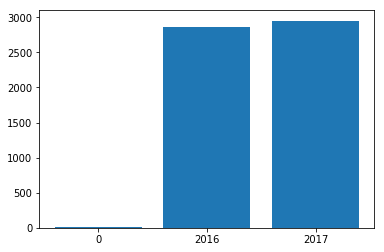

In [533]:
# %%pycodestyle
# !pip install pandasql
from pandasql import sqldf
from pandasql import load_meat, load_births
import matplotlib.pyplot as plt
sqlqry = sqldf("select Year, COUNT(Approved) as People "
               "from df2 "
               "WHERE Approved = 1 "
               "group by 1 "
               "order by 1 ")

# print(sqlqry['Year'], sqlqry['People'])
x = ['0', '2016', '2017']
y = [14, 2863, 2950]
plt.bar(x, y)
plt.show()

<BarContainer object of 10 artists>

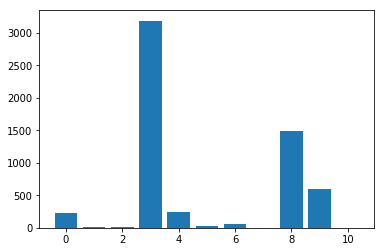

In [534]:
# %%pycodestyle
sqlqry = sqldf("select Education, COUNT(Approved) as Approved from df2 "
               "WHERE Approved = 1 group by 1 order by 1")

# print(sqlqry['Approved'].fillna(0))
# print(sqlqry['Education'].fillna(0))

# 0-NaN
# 1-Doutorado
# 2-Ensino fundamental
# 3-Ensino médio
# 4-Especialização
# 5-MBA
# 6-Mestrado
# 7-Nível Técnico
# 8-Superior
# 9-Superior incompleto
# 10-Não informado

y = [14, 8, 10, 3185, 245, 21, 51, 4, 208, 1489, 591]
x = ["0", "D", "EF", "EM", "ESP", "MBA", "MSC", "N/A", "NT", "S", "SI"]

plt.bar(sqlqry['Education'], sqlqry['Approved'])

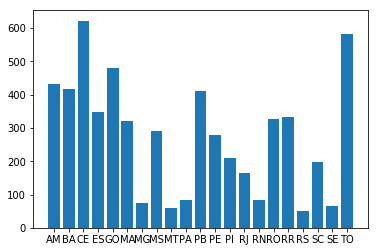

In [535]:
# %%pycodestyle
sqlqry = sqldf("select PlaceTest, COUNT(Approved) as "
               "Approved from df2 WHERE Approved = 1 group by 1 order by 1")

labels = ["AM", "BA", "CE", "ES", "GO", "MA", "MG", "MS",
          "MT", "PA", "PB", "PE", "PI", "RJ", "RN", "RO",
          "RR", "RS", "SC", "SE", "TO"]

y = sqlqry['Approved']
x = sqlqry['PlaceTest']
plt.bar(x, y)
plt.xticks(x, labels)
plt.show()

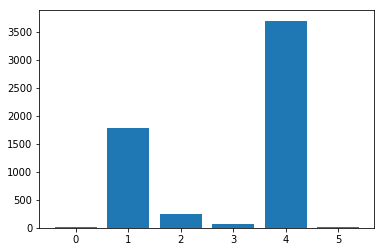

In [536]:
# %%pycodestyle
sqlqry = sqldf("select MaritalStatus, COUNT(Approved) as "
               "Approved from df2 WHERE Approved = 1 group by 1 order by 1")

# 0 - NaN or 0,
# 1-Married
# 2-Divorced
# 3-Separated
# 4-Single
# 5-Widow

x = sqlqry['MaritalStatus'].fillna('0')
y = sqlqry['Approved'].fillna(0)

plt.bar(x, y)
plt.show()

<BarContainer object of 10 artists>

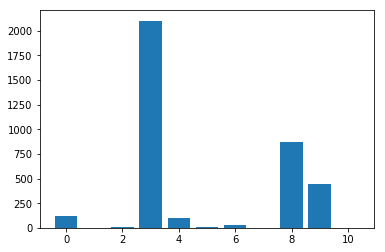

In [537]:
# %%pycodestyle
# Find people group by Education
# with how many people with Single marital status.
sqlqry = sqldf("select Education, COUNT(MaritalStatus) as MaritalStatus "
               "from df2 where approved = 1 and maritalStatus = 4 "
               "group by 1 order by 1")

plt.bar(sqlqry['Education'], sqlqry['MaritalStatus'])

<BarContainer object of 10 artists>

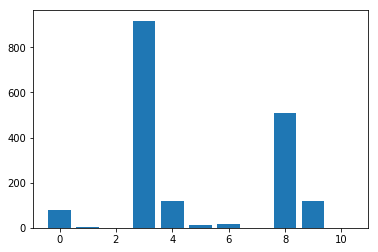

In [538]:
# %%pycodestyle
# Find people group by Education
# with how many people with Single marital status.

sqlqry = sqldf("select Education, COUNT(MaritalStatus) as MaritalStatus "
               "from df2 where approved = 1 and maritalStatus = 1 "
               "group by 1 order by 1")

plt.bar(sqlqry['Education'], sqlqry['MaritalStatus'])

In [539]:
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,21,2017-01-13,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1,1,2017
1,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1,10,2017
2,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
3,21,2017-02-01,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1,2,2017
4,21,2017-09-01,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1,9,2017


In [540]:
df2[['Rate', 'TextRate']].describe()

,Rate,TextRate
count,12100.000000,12100.000000
mean,4.577988,0.874373
std,1.704218,0.855287
min,0.750000,0.000000
25%,3.000000,0.000000
50%,4.850000,1.100000
75%,5.950000,1.700000
max,10.000000,2.500000


---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025d3b2400>,
      dtype=object)

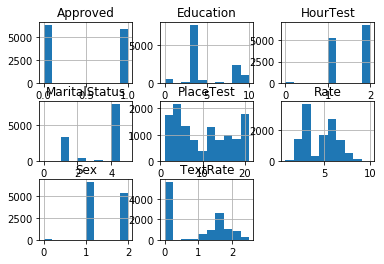

In [541]:
# %%pycodestyle
df2[['PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest',
     'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood',
     'Approved']].hist()

In [542]:
# %%pycodestyle
# Separate Approved, Not Approved

df2.groupby('Approved')['Approved']\
    .agg({'HowMany': 'count'})

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,HowMany
Approved,
0,6273
1,5827


In [543]:
# %%pycodestyle
# Group by approved by Region
df2.assign(NotApproved=1 - df2['Approved'])\
    .groupby('PlaceTest').sum().reset_index()

,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate,Month,Year,NotApproved
0,1,4127.05,707.80,1326,1270,2514,4240,431,4834.85,442,3419,1811126,467
1,2,3835.20,722.20,1372,1199,2530,3996,416,4557.40,441,4618,1687929,421
2,3,6613.10,1109.60,2359,2367,5204,6190,622,7722.70,712,8271,3117636,934
3,4,2995.15,620.40,861,821,1777,2926,348,3615.55,381,3522,1228131,261
4,5,4052.96,836.71,1179,1073,2189,3750,480,4889.67,497,4201,1566937,297
5,6,2718.55,616.30,915,755,1528,2486,320,3334.85,364,2914,1099094,225
6,7,972.25,179.50,335,335,789,1054,73,1151.75,108,1009,488114,169
7,8,2682.55,539.30,844,784,1783,2567,292,3221.85,321,3190,1121235,264
8,9,603.45,130.70,228,219,428,735,60,734.15,80,378,284397,81
9,10,937.95,184.20,347,346,739,993,83,1122.15,112,836,463877,147


---

In [544]:
# %%pycodestyle
# Separate two dataframes with approved and not approved.
df_Winners = df2[df2.Approved == 1]
df_Losers = df2[df2.Approved == 0]

In [545]:
# %%pycodestyle

# Check if everything is good
df_Winners.describe()
df_Losers.describe()

,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate,Month,Year
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.0,6273.000000,6273.000000,6273.000000,6273.000000
mean,9.946278,3.125410,0.126128,1.559700,1.491312,3.121951,4.066157,0.0,3.251538,0.097880,4.903236,2008.360912
std,6.800886,0.784332,0.394745,0.504743,0.508188,1.344496,2.340360,0.0,1.088173,0.297176,4.074174,129.577590
min,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.750000,0.000000,0.000000,0.000000
25%,3.000000,2.750000,0.000000,1.000000,1.000000,1.000000,3.000000,0.0,2.750000,0.000000,1.000000,2016.000000
50%,10.000000,3.000000,0.000000,2.000000,1.000000,4.000000,3.000000,0.0,3.000000,0.000000,4.000000,2017.000000
75%,16.000000,3.500000,0.000000,2.000000,2.000000,4.000000,3.000000,0.0,3.500000,0.000000,8.000000,2017.000000
max,21.000000,6.250000,1.700000,2.000000,2.000000,5.000000,10.000000,0.0,6.650000,1.000000,12.000000,2017.000000


In [546]:
# %%pycodestyle
# Group by approved by Region

df_Winners.groupby(['PlaceTest'])\
    .aggregate('count').reset_index()\
    .sort_values('PlaceTest', ascending=False)

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
20,21,577,582,582,582,582,582,582,577,577,582,582,582,582,582
19,20,65,65,65,65,65,65,65,65,65,65,65,65,65,65
18,19,197,197,197,197,197,197,197,197,197,197,197,197,197,197
17,18,49,49,49,49,49,49,49,49,49,49,49,49,49,49
16,17,333,334,334,334,334,334,334,333,333,334,334,334,334,334
15,16,326,326,326,326,326,326,326,326,326,326,326,326,326,326
14,15,84,84,84,84,84,84,84,84,84,84,84,84,84,84
13,14,165,165,165,165,165,165,165,165,165,165,165,165,165,165
12,13,209,209,209,209,209,209,209,209,209,209,209,209,209,209
11,12,280,280,280,280,280,280,280,280,280,280,280,280,280,280


In [547]:
# %%pycodestyle
# Scale data, to all data be in the same scale.
from sklearn.preprocessing import scale
df_Winners = df_Winners.drop(['Neighborhood',
                              'DateTest', 'Hometown', 'Year'], axis=1)
df_Winners_scale = scale(df_Winners)

In [548]:
df_Winners_scale

array([[ 1.71435667,  1.62076568,  1.64807907, ...,  1.84572132,
         0.        , -1.2034283 ],
       [ 1.71435667,  1.55882179,  2.28181968, ...,  1.99714528,
         0.        ,  1.06065745],
       [ 1.71435667,  1.434934  ,  0.38059784, ...,  1.29050013,
         0.        ,  0.3059622 ],
       ...,
       [-0.70369025, -1.22865349, -2.47123493, ..., -1.78845377,
         0.        , -1.2034283 ],
       [-0.70369025, -1.41448518, -2.15436462, ..., -1.83892842,
         0.        ,  1.31222253],
       [ 1.10984494, -1.04282181,  0.38059784, ..., -0.72848603,
         0.        ,  0.3059622 ]])

In [549]:
sample = np.arange(1, 5826, 10)

In [550]:
df_Winners_sample = df_Winners_scale[sample,]

In [551]:
from scipy.spatial.distance import pdist
d = pdist(df_Winners_sample)

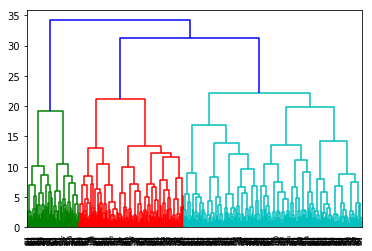

In [552]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

c = ward(d)
d = dendrogram(c)

In [553]:
cutree = cut_tree(c, n_clusters=[20, 50])
cutree[1:10]

array([[1, 1],
       [2, 2],
       [1, 1],
       [3, 3],
       [4, 4],
       [4, 4],
       [4, 5],
       [5, 6],
       [6, 7]])

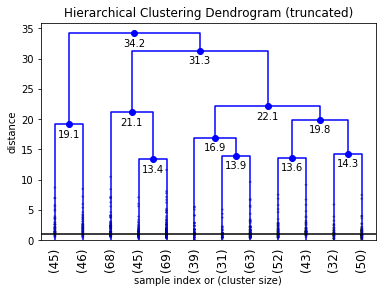

In [554]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
fancy_dendrogram(
    c,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=1,
)
plt.show()

In [624]:
# from scipy.cluster.hierarchy import fcluster
# max_d = 50
# clusters = fcluster(c, max_d, criterion='distance')
# clusters
# k=2
# fcluster(c, k, criterion='maxclust')
# from scipy.cluster.hierarchy import fcluster
# fcluster(c, 8, depth=10)

---

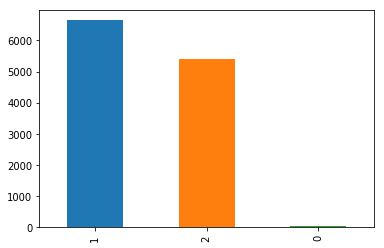

In [556]:
df2.Sex.value_counts()[:].plot(kind='bar')

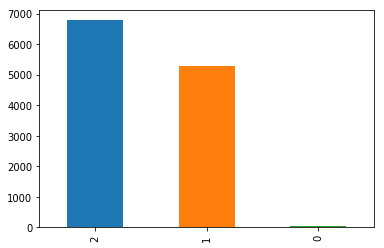

In [557]:
df2.HourTest.value_counts()[:].plot(kind='bar')

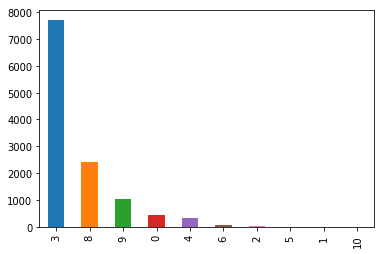

In [558]:
df2.Education.value_counts()[:].plot(kind='bar')

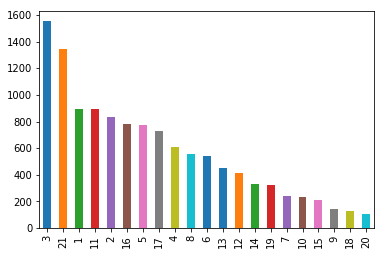

In [559]:
df2.PlaceTest.value_counts()[:].plot(kind='bar')

In [560]:
# %%pycodestyle

rfmTable = df_Winners.groupby('PlaceTest')\
    .agg({'Approved': lambda x: x.count()})

rfmTable['Approved'] = rfmTable['Approved'].astype(int)
rfmTable.rename(columns={'Approved': 'frequency'}, inplace=True)
rfmTable

,frequency
PlaceTest,
1,431
2,416
3,622
4,348
5,480
6,320
7,73
8,292
9,60


---

In [561]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [562]:
# %%pycodestyle
# Correlation
cols = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education']
print(df2[cols].corr())

               PlaceTest  HourTest       Sex  MaritalStatus  Education
PlaceTest       1.000000  0.048759  0.011931       0.009447  -0.018663
HourTest        0.048759  1.000000  0.033077       0.030032   0.002994
Sex             0.011931  0.033077  1.000000       0.122772   0.051509
MaritalStatus   0.009447  0.030032  0.122772       1.000000  -0.022826
Education      -0.018663  0.002994  0.051509      -0.022826   1.000000


In [563]:
# Attributes and target variables
features = df2[['PlaceTest', 'HourTest','MaritalStatus', 'Education', 'AllRate']]
targetVariables = df2.Approved

In [564]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

In [565]:
# Obtains the observation numbers and attribute numbers
n_observ, n_features = df2.shape

In [566]:
df2

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,21,2017-01-13,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1,1,2017
1,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1,10,2017
2,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
3,21,2017-02-01,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1,2,2017
4,21,2017-09-01,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1,9,2017
5,21,2017-10-01,6.90,2.4,1,2,4,3,ANÁPOLIS,Jardim Europa,1,9.30,1,10,2017
6,21,2017-10-01,6.90,1.9,1,1,4,3,ALEXÂNIA,SETOR NORTE,1,8.80,1,10,2017
7,21,2017-10-01,6.75,1.5,1,2,4,8,ENTRE RIOS DE MINAS,Sul (Águas Claras),1,8.25,1,10,2017
8,21,2017-01-14,6.45,2.2,1,1,4,8,Brasilia,Riacho Fundo II,1,8.65,1,1,2017
9,21,2017-05-01,6.45,1.7,1,1,4,3,BRASÍLIA,Centro,1,8.15,1,5,2017


In [567]:
# Applies data scale
df3 = df2
#df3['Rate'] = scale(df3.Rate)
#df3['TextRate'] = scale(df3.TextRate)
#df3['AllRate'] = scale(df3.AllRate)

In [568]:
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,21,2017-01-13,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1,1,2017
1,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1,10,2017
2,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
3,21,2017-02-01,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1,2,2017
4,21,2017-09-01,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1,9,2017


In [569]:
n_observ

12100

In [570]:
n_features

15

In [571]:
# Obtains the labels
n_digits = len(np.unique(df3.Approved))
labels = df3.Approved

In [572]:
# %%pycodestyle
df3 = df2.drop(columns=['Rate', 'TextRate', 'AllRate',
                        'DateTest', 'Neighborhood', 'Hometown'])

In [573]:
labels
df3.head()

,PlaceTest,HourTest,Sex,MaritalStatus,Education,Approved,HasTextRate,Month,Year
0,21,1,1,1,3,1,1,1,2017
1,21,1,1,1,4,1,1,10,2017
2,21,1,1,1,8,1,1,7,2017
3,21,2,1,4,3,1,1,2,2017
4,21,1,2,4,8,1,1,9,2017


In [574]:
# %%pycodestyle
# Creates classifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_estimators=10)

In [575]:
# Model construction
clf = clf.fit(df3, labels)

In [576]:
scores = clf.score(df3,labels)

In [577]:
print(scores)

1.0


In [578]:
# Extracting importance
importances = clf.feature_importances_
indices = np.argsort(importances)

In [579]:
# Obtains the indexes
ind=[]
for i in indices:
    ind.append(labels[i])

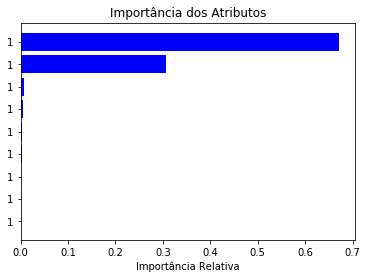

In [580]:
# %%pycodestyle
# Plots attribute importance

plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), ind)
plt.xlabel('Importância Relativa')
plt.show()

In [581]:
# %%pycodestyle
# Usando um algoritmo de arvore de decisão,quais correlações foram encontradas?
# ( disponibilizar o código que vai até o banco, coleta os dados e analisa)

In [582]:
# %%pycodestyle
# Correlation between variables
# Correlacao mais proximo a 1 ha uma influencia mais forte positivamente
# Correlacao mais proximo a -1 ha uma influencia mais forte negativamente
df2.corr()

,PlaceTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Approved,AllRate,HasTextRate,Month,Year
PlaceTest,1.000000,-0.029688,-0.007552,0.048759,0.011931,0.009447,-0.018663,-0.021583,-0.022729,-0.014811,0.068060,-0.029238
Rate,-0.029688,1.000000,0.914293,-0.006001,-0.132599,-0.062073,0.183064,0.884397,0.990431,0.894960,0.134060,0.017709
TextRate,-0.007552,0.914293,1.000000,0.002686,-0.091577,-0.039583,0.174627,0.907747,0.961445,0.958287,0.091418,0.008868
HourTest,0.048759,-0.006001,0.002686,1.000000,0.033077,0.030032,0.002994,-0.005175,-0.003159,0.001033,-0.008816,0.178320
Sex,0.011931,-0.132599,-0.091577,0.033077,1.000000,0.122772,0.051509,-0.096539,-0.121226,-0.100262,0.019245,0.165124
MaritalStatus,0.009447,-0.062073,-0.039583,0.030032,0.122772,1.000000,-0.022826,-0.051879,-0.055629,-0.054593,0.020890,0.128200
Education,-0.018663,0.183064,0.174627,0.002994,0.051509,-0.022826,1.000000,0.153990,0.183784,0.148282,-0.036206,0.101243
Approved,-0.021583,0.884397,0.907747,-0.005175,-0.096539,-0.051879,0.153990,1.000000,0.909716,0.903396,0.108618,0.014252
AllRate,-0.022729,0.990431,0.961445,-0.003159,-0.121226,-0.055629,0.183784,0.909716,1.000000,0.934108,0.122163,0.015044
HasTextRate,-0.014811,0.894960,0.958287,0.001033,-0.100262,-0.054593,0.148282,0.903396,0.934108,1.000000,0.084525,0.014570


In [583]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [584]:
# Cria o classificador
rf = RandomForestClassifier(max_depth = 5)

In [585]:
# Obtém os índices a partir do comprimento da variável targetr
idx = list(range(len(df3.Approved)))

In [586]:
# Randomiza o ínidce
np.random.shuffle(idx)

In [587]:
df4_Array = df3.values

In [588]:
# Cria o modelo
rf.fit(df4_Array[idx][:100], df3.Approved[idx][:100].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [589]:
# Obtém as instâncias (exemplos ou observações) e retorna as probabilidades
instance = df4_Array[idx][100:101]
print(rf.predict_proba(instance))

[[0.97777778 0.02222222]]


In [590]:
df3.feature_names = ['PlaceTest', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'HasTextRate']

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [591]:
prediction, bias, contributions = ti.predict(rf, instance)
print ("Previsões", prediction)
print ("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], df3.feature_names):
    print (feature, item)

Previsões [[0.97777778 0.02222222]]
Contribuição dos Atributos:
PlaceTest [ 0.02063492 -0.02063492]
HourTest [0. 0.]
Sex [-0.01557377  0.01557377]
MaritalStatus [0. 0.]
Education [ 0.02261857 -0.02261857]
HasTextRate [ 0.22392857 -0.22392857]


In [592]:
# Contribuição dos Atributos:
# Para Previsões [[1. 0.]]
# PlaceTest [ 0.01503268 -0.01503268]
# HourTest [0. 0.]
# Sex [0. 0.]
# MaritalStatus [ 0.00522388 -0.00522388]
# Education [-0.00319149  0.00319149]
# HasTextRate [ 0.30474673 -0.30474673]

In [622]:
# %%pycodestyle 
# Regressor to find which variable or
# feature are responsable to define if that person
# has chance to not approved
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [594]:
# Imprimindo o nome das colunas
print(df2.columns)

Index(['PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved', 'AllRate', 'HasTextRate', 'Month', 'Year'], dtype='object')


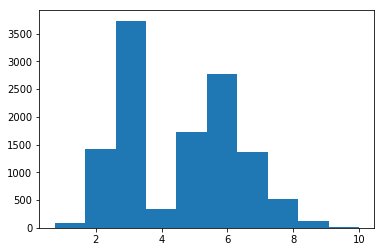

In [595]:
# Histograma com a média de avaliações
plt.hist(df2["Rate"])
plt.show()

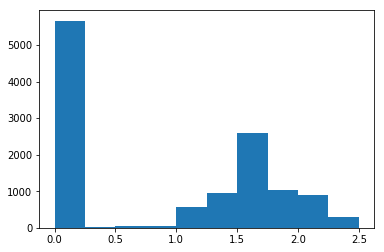

In [596]:
plt.hist(df2["TextRate"])
plt.show()

In [597]:
# Visualizando as observações com rating igual a 0
df2[df2["TextRate"] == 0]

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
2306,21,2017-12-01,4.50,0.0,1,2,2,3,planaltina,Setor norte,0,4.50,0,12,2017
2310,21,2017-01-15,4.00,0.0,1,1,1,8,Brasília,Guará I,0,4.00,0,1,2017
2311,21,2017-02-01,4.00,0.0,2,2,4,3,Serra Dourada,Jd. Progresso,0,4.00,0,2,2017
2312,21,2017-10-01,4.00,0.0,1,1,1,0,MUNDO NOVO - BA,Riacho Fundo II,0,4.00,0,10,2017
2313,21,2017-12-01,3.75,0.0,1,1,1,3,morros,setor leste,0,3.75,0,12,2017
2314,21,2017-02-01,3.75,0.0,1,1,4,3,alexânia,Centro,0,3.75,0,2,2017
2315,21,2017-06-01,3.50,0.0,2,2,4,3,Brasília,Asa Sul,0,3.50,0,6,2017
2316,21,2017-05-01,3.50,0.0,1,1,1,3,Teodoro Sampaio,Centro,0,3.50,0,5,2017
2317,21,2017-02-01,3.25,0.0,1,1,4,3,Alexânia,Taguatinga sul,0,3.25,0,2,2017
2318,21,2017-12-01,3.25,0.0,1,2,2,3,pio ix,Setor Norte,0,3.25,0,12,2017


In [598]:
# Correlação
df2.corr()["TextRate"]

PlaceTest       -0.007552
Rate             0.914293
TextRate         1.000000
HourTest         0.002686
Sex             -0.091577
MaritalStatus   -0.039583
Education        0.174627
Approved         0.907747
AllRate          0.961445
HasTextRate      0.958287
Month            0.091418
Year             0.008868
Name: TextRate, dtype: float64

In [599]:
# Obtém todas as colunas do dataframe
colunas = df2.columns.tolist()

In [600]:
# Filtra as colunas e remove as que não são relevantes
colunas = [c for c in colunas if c not in ["Id", "Approved", "AllRate", "HasTextRate", "TextRate", "Neighborhood", "Hometown", "DateTest"]]

In [601]:
# Preparando a variável target, a que será prevista
target = "TextRate"

In [602]:
# Gerando os dados de treino
df_treino = df2.sample(frac = 0.8, random_state = 101)

In [603]:
# Seleciona tudo que não está no dataset de treino e armazena no dataset de teste
df_teste = df2.loc[~df2.index.isin(df_treino.index)]

In [604]:
# Shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

(9680, 15)
(2420, 15)


In [605]:
# Criando um Regressor
reg_v1 = LinearRegression()

In [606]:
# Fit the model to the training data.
modelo_v1 = reg_v1.fit(df_treino[colunas], df_treino[target])

In [607]:
modelo_v1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [608]:
# Fazendo previsões
previsoes = modelo_v1.predict(df_teste[colunas])

In [609]:
# Computando os erros entre valores observados e valores previstos
mean_squared_error(previsoes, df_teste[target])

0.12215026334078863

In [610]:
# Criando um regressor Random Forest
reg_v2 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [611]:
# Criando o modelo
modelo_v2 = reg_v2.fit(df_treino[colunas], df_treino[target])

In [612]:
# Fazendo previsões
previsoes = modelo_v2.predict(df_teste[colunas])

In [613]:
# Computando o erro
mean_squared_error(previsoes, df_teste[target])

0.04644333148320853

In [614]:
df2.to_csv("DOT_teste_data_science_2.csv", sep='\t')

In [623]:
!ls

'Cientista de Dados Teste (1).ipynb'   DOT_teste_data_science_2.csv
'Cientista de Dados Teste.ipynb'       DOT_teste_data_science.csv
'Cientista de Dados Teste.ipynb.bkp'


-----

In [616]:
## Apriori Fail
# !pip install apyori
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from apyori import apriori  

  Running setup.py bdist_wheel for apyori ... done
  Stored in directory: /home/oracy/.cache/pip/wheels/7b/2a/35/c0c3749c1a36d4f454ea22d8396e1b854b86340d63cbbb7949
Successfully built apyori


In [617]:
store_data = pd.read_csv("DOT_teste_data_science_2.csv", sep="\t")

In [618]:
store_data.head()

,Unnamed: 0,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved,AllRate,HasTextRate,Month,Year
0,0,21,2017-01-13,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1,9.65,1,1,2017
1,1,21,2017-10-01,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1,9.80,1,10,2017
2,2,21,2017-07-01,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1,9.10,1,7,2017
3,3,21,2017-02-01,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1,8.90,1,2,2017
4,4,21,2017-09-01,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1,8.65,1,9,2017


In [619]:
store_data.columns.size

16

In [620]:
records = []  
for i in range(0, 12100):  
    records.append([str(store_data.values[i,j]) for j in range(0, 16)])

In [621]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
association_results = list(association_rules)

KeyboardInterrupt: 

In [ ]:
print(len(association_rules))

In [ ]:
print(association_rules[0])  

In [ ]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")